In [1]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [2]:
path = '/home/hassan/lily/MLA/FDA/inpatient_admission_withtarget.csv'
inpatient = pd.read_csv(path).iloc[:,1:]
inpatient.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Cardiovascular,Readmission
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,0,1,NaN,1.0,Utah,0,0
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,0,1,0.0,0.0,North Carolina,0,1
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,0,1,NaN,0.0,North Carolina,0,1
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,0,1,NaN,1.0,Florida,0,0
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,0,1,NaN,NaN,Idaho,0,0


In [3]:
path = '/home/bhatti/dataset/VCHAMPS/medications_ordered_train.csv'
medications = pd.read_csv(path).iloc[:,1:]
medications.head()

,Internalpatientid,Age at med ordered,Order date,Medication start date,Medication stop date,Order discontinue date,Ordered medication atc 5,Order status,Stop reason,State
0,1,59.763581,2004-01-09 14:07:46.0,2004-01-09 01:33:46.0,2004-04-02 11:27:46.0,2004-04-02 11:27:46.0,lisinopril,discontinued/edit,Not specified (no value),Indiana
1,1,59.998896,2004-04-04 14:19:12.0,2004-04-04 04:26:12.0,2005-03-07 04:26:12.0,2005-04-17 15:19:12.0,Not specified,discontinued,Not specified (no value),Indiana
2,1,60.794427,2005-01-20 08:43:00.0,2005-01-19 20:06:00.0,2005-06-29 05:18:00.0,2005-06-29 05:18:00.0,lisinopril,discontinued,Requesting Physician Cancelled,Indiana
3,1,61.136678,2005-05-25 10:56:29.0,2005-05-24 20:23:29.0,2005-06-23 20:23:29.0,NaN,amoxicillin,expired,Not specified (no value),Indiana
4,1,63.256011,2007-07-09 01:43:28.0,2007-07-08 20:21:28.0,2007-08-07 20:21:28.0,NaN,Not specified,expired,Not specified (no value),Indiana


In [19]:
medications.shape

(59043379, 10)

In [94]:
medications['Order date'] = pd.to_datetime(medications['Order date'])
medications['Medication start date'] = pd.to_datetime(medications['Medication start date'])
medications['Medication stop date'] = pd.to_datetime(medications['Medication stop date'])
medications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59043379 entries, 0 to 59043378
Data columns (total 10 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Internalpatientid         int64         
 1   Age at med ordered        float64       
 2   Order date                datetime64[ns]
 3   Medication start date     datetime64[ns]
 4   Medication stop date      datetime64[ns]
 5   Order discontinue date    object        
 6   Ordered medication atc 5  object        
 7   Order status              object        
 8   Stop reason               object        
 9   State                     object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 4.4+ GB


In [95]:
inpatient['Admission date'] = pd.to_datetime(inpatient['Admission date'])
inpatient['Discharge date'] = pd.to_datetime(inpatient['Discharge date'])
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522740 entries, 0 to 522739
Data columns (total 18 columns):
 #   Column                                               Non-Null Count   Dtype         
---  ------                                               --------------   -----         
 0   Internalpatientid                                    522740 non-null  int64         
 1   Age at admission                                     522740 non-null  float64       
 2   Admission date                                       522740 non-null  datetime64[ns]
 3   Discharge date                                       522246 non-null  datetime64[ns]
 4   Admitting unit service                               522740 non-null  object        
 5   Discharging unit service                             522740 non-null  object        
 6   Admitting specialty                                  522740 non-null  object        
 7   Discharging specialty                                522740 non-null  obje

In [6]:
medications['Ordered medication atc 5'].nunique()

4259

In [46]:
medications['Order status'].unique()

array(['discontinued/edit', 'discontinued', 'expired', 'cancelled',
       'complete', 'active', 'lapsed', 'unreleased', 'pending', 'hold',
       'delayed', 'renewed'], dtype=object)

In [48]:
len(medications.loc[medications['Order status'] == 'complete'])/len(medications.loc[medications['Order status'] != 'complete'])

0.017189554123145354

In [50]:
len(medications.loc[medications['Order status'] == 'complete'])

997778

Keep order status == complete. For other order status, we can not make sure if the patient took medicines or not
Though we will loss 99% data, we still have 997778 rows, that's enough?

In [155]:
medication_complete = medications.loc[medications['Order status'] == 'complete']
medication_complete = medication_complete.groupby('Internalpatientid').apply(lambda x:x).sort_values(by = ['Internalpatientid','Order date'],ascending=True).reset_index(drop = True)
medication_complete

/tmp/ipykernel_16217/2219256273.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  medication_complete = medication_complete.groupby('Internalpatientid').apply(lambda x:x).sort_values(by = ['Internalpatientid','Order date'],ascending=True).reset_index(drop = True)


,Internalpatientid,Age at med ordered,Order date,Medication start date,Medication stop date,Order discontinue date,Ordered medication atc 5,Order status,Stop reason,State
0,1,67.676627,2011-12-10 19:22:08,2011-12-10 23:24:08,2011-12-11 08:43:08,NaN,metoprolol,complete,Not specified (no value),Indiana
1,1,67.676629,2011-12-10 19:23:08,2011-12-10 23:24:08,2011-12-14 19:04:08,NaN,enoxaparin,complete,Not specified (no value),Indiana
2,1,67.681145,2011-12-12 11:00:29,2011-12-12 18:36:29,2011-12-14 19:16:29,NaN,warfarin,complete,Not specified (no value),Indiana
3,1,67.683815,2011-12-13 10:25:41,2011-12-13 11:22:41,2011-12-14 15:36:41,NaN,metoprolol,complete,Not specified (no value),Indiana
4,1,68.344835,2012-08-11 00:53:30,2012-08-11 01:05:30,2012-08-11 01:56:30,NaN,hydralazine,complete,Not specified (no value),Indiana
...,...,...,...,...,...,...,...,...,...,...
997773,169064,81.672310,2008-08-19 05:30:05,2008-08-19 07:29:05,2008-08-20 04:44:05,NaN,Not specified,complete,Not specified (no value),Wyoming
997774,169064,81.672310,2008-08-19 05:30:05,2008-08-19 07:29:05,2008-08-20 04:44:05,NaN,cefazolin,complete,Not specified (no value),Wyoming
997775,169064,81.686250,2008-08-24 07:47:06,2008-08-24 11:50:06,2008-08-26 08:04:06,NaN,potassium chloride,complete,Not specified (no value),Wyoming
997776,169064,81.688942,2008-08-25 07:24:07,2008-08-25 15:22:07,2008-08-26 08:06:07,NaN,ciprofloxacin,complete,Not specified (no value),Wyoming


In [109]:
inpatient_date = inpatient[['Internalpatientid','Age at admission','Admitting specialty',
                             'Admission date','Discharge date','Died during admission', 'Readmission']]
inpatient_date = inpatient_date.groupby('Internalpatientid').apply(lambda x:x).sort_values(by = ['Internalpatientid','Admission date'],ascending=True).reset_index(drop = True)
inpatient_date

/tmp/ipykernel_16217/199307698.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  inpatient_date = inpatient_date.groupby('Internalpatientid').apply(lambda x:x).sort_values(by = ['Internalpatientid','Admission date'],ascending=True).reset_index(drop = True)


,Internalpatientid,Age at admission,Admitting specialty,Admission date,Discharge date,Died during admission,Readmission
0,1,67.676524,PODIATRY,2011-12-10 18:28:02,2011-12-14 18:23:17,0,1
1,1,68.344672,PERIPHERAL VASCULAR,2012-08-10 23:27:47,2012-08-14 20:57:06,0,1
2,1,72.272607,SPINAL CORD INJURY,2016-07-16 15:18:16,2016-07-22 21:36:24,0,1
3,1,78.725684,DERMATOLOGY,2022-12-31 05:41:51,2023-01-01 23:06:30,0,1
4,2,55.027326,SURGICAL OBSERVATION,2009-09-30 11:42:00,2009-10-01 06:33:38,0,1
...,...,...,...,...,...,...,...
522735,169062,73.604059,GENERAL SURGERY,2005-03-17 06:48:07,2005-04-29 10:02:03,0,1
522736,169062,73.771479,"PULMONARY, TUBERCULOSIS",2005-05-17 11:24:53,2005-05-19 03:28:31,0,1
522737,169062,73.811463,"PULMONARY, TUBERCULOSIS",2005-06-01 02:09:21,2005-06-04 03:34:07,0,1
522738,169062,74.065762,GASTROENTEROLOGY,2005-09-02 00:52:01,2005-10-14 23:52:38,1,1


In [156]:
# Fill order stop date and order start date with order date, 
# Combine inpatient and medications, medication start and stop date are between admission and discharge date
# replace order stop date that are the same as Order date with corresponding discharge date
medication_complete['Medication start date'] = medication_complete['Medication start date'].fillna(medication_complete['Order date'])
medication_complete['Medication stop date'] = medication_complete['Medication stop date'].fillna(medication_complete['Order date'])

In [157]:
inpatient_med_complete = pd.merge(medication_complete, inpatient_date, how = 'left', left_on = 'Internalpatientid', right_on = 'Internalpatientid')
inpatient_med_complete = inpatient_med_complete[(inpatient_med_complete['Medication start date'] >= inpatient_med_complete['Admission date'])
                                                &(inpatient_med_complete['Medication start date'] <= inpatient_med_complete['Discharge date'])
                                                &(inpatient_med_complete['Medication stop date'] >= inpatient_med_complete['Admission date'])
                                                &(inpatient_med_complete['Medication stop date'] <= inpatient_med_complete['Discharge date'])]


In [158]:
def replace_stop_date(data):
    for i in range(len(data)):
        if data['Medication stop date'].iloc[i] == data['Order date'].iloc[i]:
            data['Medication stop date'].iloc[i] = data['Discharge date'].iloc[i]
    return data
inpatient_med_complete  = replace_stop_date(inpatient_med_complete )

/tmp/ipykernel_16217/2874673455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Medication stop date'].iloc[i] = data['Discharge date'].iloc[i]


In [159]:
#inpatient_med_complete[inpatient_med_complete.duplicated(subset = ['Internalpatientid','Medication start date','Admitting specialty','Ordered medication atc 5'],keep = False)]
inpatient_med_complete = inpatient_med_complete.drop_duplicates(subset = ['Internalpatientid','Medication start date','Admitting specialty','Ordered medication atc 5'],keep = 'first')
inpatient_med_complete 

,Internalpatientid,Age at med ordered,Order date,Medication start date,Medication stop date,Order discontinue date,Ordered medication atc 5,Order status,Stop reason,State,Age at admission,Admitting specialty,Admission date,Discharge date,Died during admission,Readmission
0,1,67.676627,2011-12-10 19:22:08,2011-12-10 23:24:08,2011-12-11 08:43:08,NaN,metoprolol,complete,Not specified (no value),Indiana,67.676524,PODIATRY,2011-12-10 18:28:02,2011-12-14 18:23:17,0.0,1.0
12,1,67.683815,2011-12-13 10:25:41,2011-12-13 11:22:41,2011-12-14 15:36:41,NaN,metoprolol,complete,Not specified (no value),Indiana,67.676524,PODIATRY,2011-12-10 18:28:02,2011-12-14 18:23:17,0.0,1.0
17,1,68.344835,2012-08-11 00:53:30,2012-08-11 01:05:30,2012-08-11 01:56:30,NaN,hydralazine,complete,Not specified (no value),Indiana,68.344672,PERIPHERAL VASCULAR,2012-08-10 23:27:47,2012-08-14 20:57:06,0.0,1.0
91,2,57.800488,2012-07-10 01:52:43,2012-07-10 07:55:43,2012-07-10 03:09:43,NaN,acetylsalicylic acid,complete,Not specified (no value),Texas,57.799091,ED OBSERVATION,2012-07-09 13:37:22,2012-07-10 10:43:20,0.0,1.0
158,2,59.717555,2014-06-10 18:23:29,2014-06-10 18:23:29,2014-06-11 07:55:29,NaN,trazodone,complete,Not specified (no value),Texas,59.716369,ED OBSERVATION,2014-06-10 07:59:09,2014-06-11 08:08:04,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123158,169062,74.086904,2005-09-09 18:19:16,2005-09-10 14:59:16,2005-09-16 21:03:16,NaN,fluconazole,complete,Not specified (no value),Florida,74.065762,GASTROENTEROLOGY,2005-09-02 00:52:01,2005-10-14 23:52:38,1.0,1.0
13123170,169062,74.097708,2005-09-13 17:05:52,2005-09-14 14:51:52,2005-09-20 20:55:52,NaN,gatifloxacin,complete,Not specified (no value),Florida,74.065762,GASTROENTEROLOGY,2005-09-02 00:52:01,2005-10-14 23:52:38,1.0,1.0
13123182,169062,74.125765,2005-09-23 23:12:32,2005-09-26 15:31:32,2005-09-27 23:16:32,NaN,fentanyl,complete,Not specified (no value),Florida,74.065762,GASTROENTEROLOGY,2005-09-02 00:52:01,2005-10-14 23:52:38,1.0,1.0
13123183,169064,81.672310,2008-08-19 05:30:05,2008-08-19 07:29:05,2008-08-20 04:44:05,NaN,Not specified,complete,Not specified (no value),Wyoming,81.672049,NH SHORT STAY SKILLED NURSING,2008-08-19 03:12:47,2008-08-26 07:34:10,0.0,0.0


In [160]:
tmp = pd.DataFrame(inpatient_med_complete.groupby(['Internalpatientid', 'Admission date'])['Ordered medication atc 5'].count())
tmp = tmp.reset_index(drop = False)
tmp = tmp.rename(columns = {'Ordered medication atc 5':'Num medication per admission'})
inpatient_med_complete = inpatient_med_complete.merge(tmp, how = 'left', on = ['Internalpatientid', 'Admission date'])
inpatient_med_complete['Total medications'] = inpatient_med_complete['Num medication per admission'].groupby(inpatient_med_complete['Internalpatientid']).transform('sum')
inpatient_med_complete

,Internalpatientid,Age at med ordered,Order date,Medication start date,Medication stop date,Order discontinue date,Ordered medication atc 5,Order status,Stop reason,State,Age at admission,Admitting specialty,Admission date,Discharge date,Died during admission,Readmission,Num medication per admission,Total medications
0,1,67.676627,2011-12-10 19:22:08,2011-12-10 23:24:08,2011-12-11 08:43:08,NaN,metoprolol,complete,Not specified (no value),Indiana,67.676524,PODIATRY,2011-12-10 18:28:02,2011-12-14 18:23:17,0.0,1.0,2,5
1,1,67.683815,2011-12-13 10:25:41,2011-12-13 11:22:41,2011-12-14 15:36:41,NaN,metoprolol,complete,Not specified (no value),Indiana,67.676524,PODIATRY,2011-12-10 18:28:02,2011-12-14 18:23:17,0.0,1.0,2,5
2,1,68.344835,2012-08-11 00:53:30,2012-08-11 01:05:30,2012-08-11 01:56:30,NaN,hydralazine,complete,Not specified (no value),Indiana,68.344672,PERIPHERAL VASCULAR,2012-08-10 23:27:47,2012-08-14 20:57:06,0.0,1.0,1,5
3,2,57.800488,2012-07-10 01:52:43,2012-07-10 07:55:43,2012-07-10 03:09:43,NaN,acetylsalicylic acid,complete,Not specified (no value),Texas,57.799091,ED OBSERVATION,2012-07-09 13:37:22,2012-07-10 10:43:20,0.0,1.0,1,46
4,2,59.717555,2014-06-10 18:23:29,2014-06-10 18:23:29,2014-06-11 07:55:29,NaN,trazodone,complete,Not specified (no value),Texas,59.716369,ED OBSERVATION,2014-06-10 07:59:09,2014-06-11 08:08:04,0.0,1.0,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594621,169062,74.086904,2005-09-09 18:19:16,2005-09-10 14:59:16,2005-09-16 21:03:16,NaN,fluconazole,complete,Not specified (no value),Florida,74.065762,GASTROENTEROLOGY,2005-09-02 00:52:01,2005-10-14 23:52:38,1.0,1.0,9,85
594622,169062,74.097708,2005-09-13 17:05:52,2005-09-14 14:51:52,2005-09-20 20:55:52,NaN,gatifloxacin,complete,Not specified (no value),Florida,74.065762,GASTROENTEROLOGY,2005-09-02 00:52:01,2005-10-14 23:52:38,1.0,1.0,9,85
594623,169062,74.125765,2005-09-23 23:12:32,2005-09-26 15:31:32,2005-09-27 23:16:32,NaN,fentanyl,complete,Not specified (no value),Florida,74.065762,GASTROENTEROLOGY,2005-09-02 00:52:01,2005-10-14 23:52:38,1.0,1.0,9,85
594624,169064,81.672310,2008-08-19 05:30:05,2008-08-19 07:29:05,2008-08-20 04:44:05,NaN,Not specified,complete,Not specified (no value),Wyoming,81.672049,NH SHORT STAY SKILLED NURSING,2008-08-19 03:12:47,2008-08-26 07:34:10,0.0,0.0,2,4


In [161]:
inpatient_med_complete.describe()

,Internalpatientid,Age at med ordered,Age at admission,Died during admission,Readmission,Num medication per admission,Total medications
count,594626.000000,594626.000000,594626.000000,594626.000000,594626.000000,594626.000000,594626.000000
mean,85166.747229,69.899766,69.775461,0.104175,0.967501,7.426372,341.578915
std,49032.689013,11.482956,11.448611,0.305487,0.177322,10.475124,1139.692365
min,1.000000,21.170277,21.167152,0.000000,0.000000,1.000000,1.000000
25%,42423.000000,61.774782,61.684836,0.000000,1.000000,2.000000,30.000000
50%,85876.000000,69.612672,69.489570,0.000000,1.000000,4.000000,88.000000
75%,127760.000000,78.316625,78.154110,0.000000,1.000000,8.000000,243.000000
max,169064.000000,108.583053,108.576613,1.000000,1.000000,154.000000,27642.000000


In [163]:
data = inpatient_med_complete
targets = ['Died during admission','Readmission']

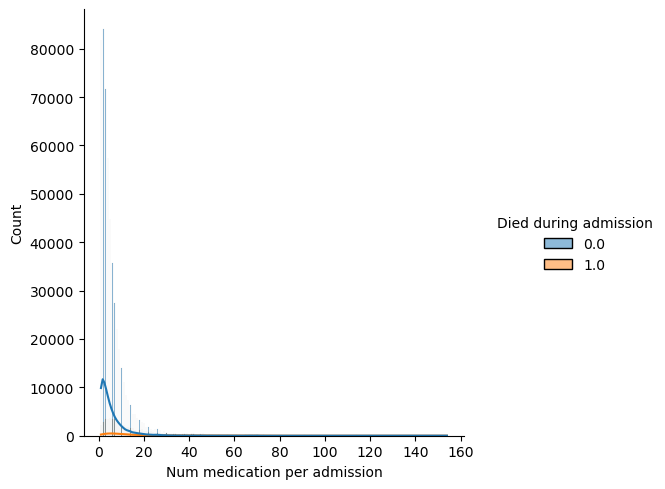

In [164]:
sns.displot(data=data, x='Num medication per admission',hue = targets[0],kde = True)

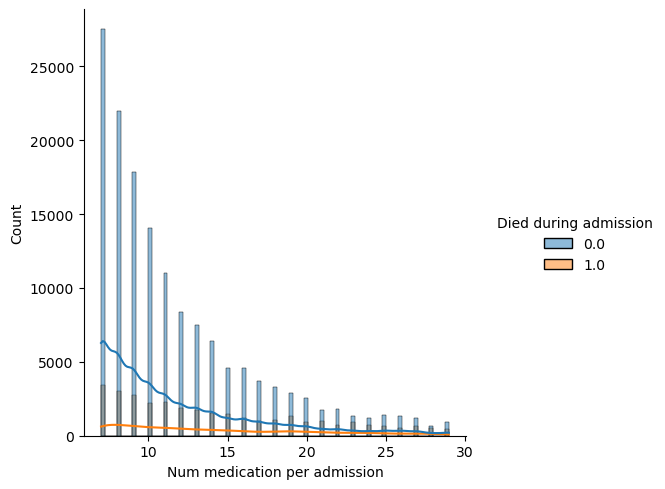

In [169]:
sns.displot(data=data.loc[(data['Num medication per admission']>6) & (data['Num medication per admission']<30)], x='Num medication per admission',hue = targets[0],kde = True)

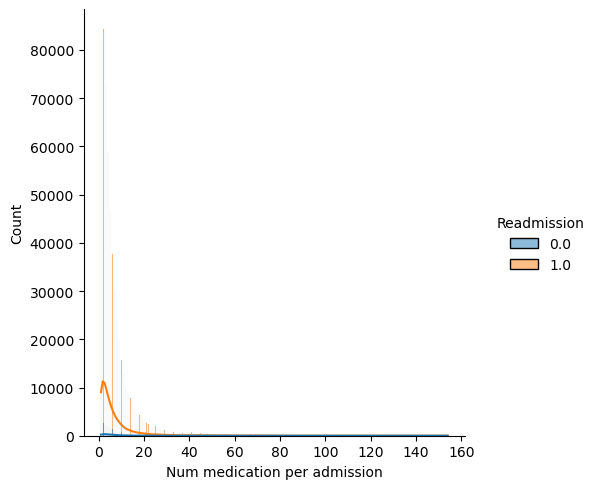

In [170]:
sns.displot(data=data, x='Num medication per admission',hue = targets[1],kde = True)

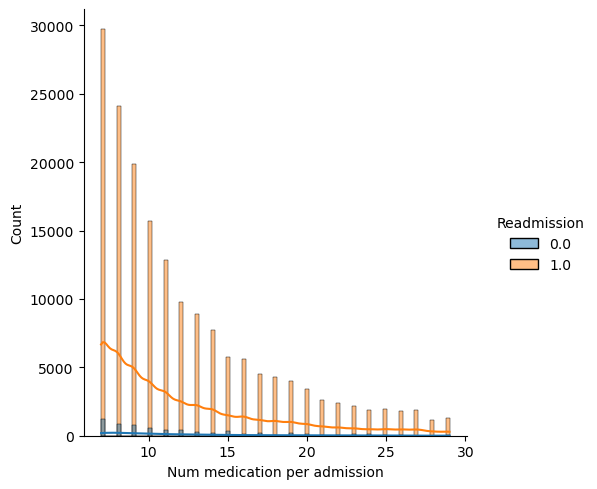

In [171]:
sns.displot(data=data.loc[(data['Num medication per admission']>6) & (data['Num medication per admission']<30)], x='Num medication per admission',hue = targets[1],kde = True)

<Axes: xlabel='Readmission', ylabel='Num medication per admission'>

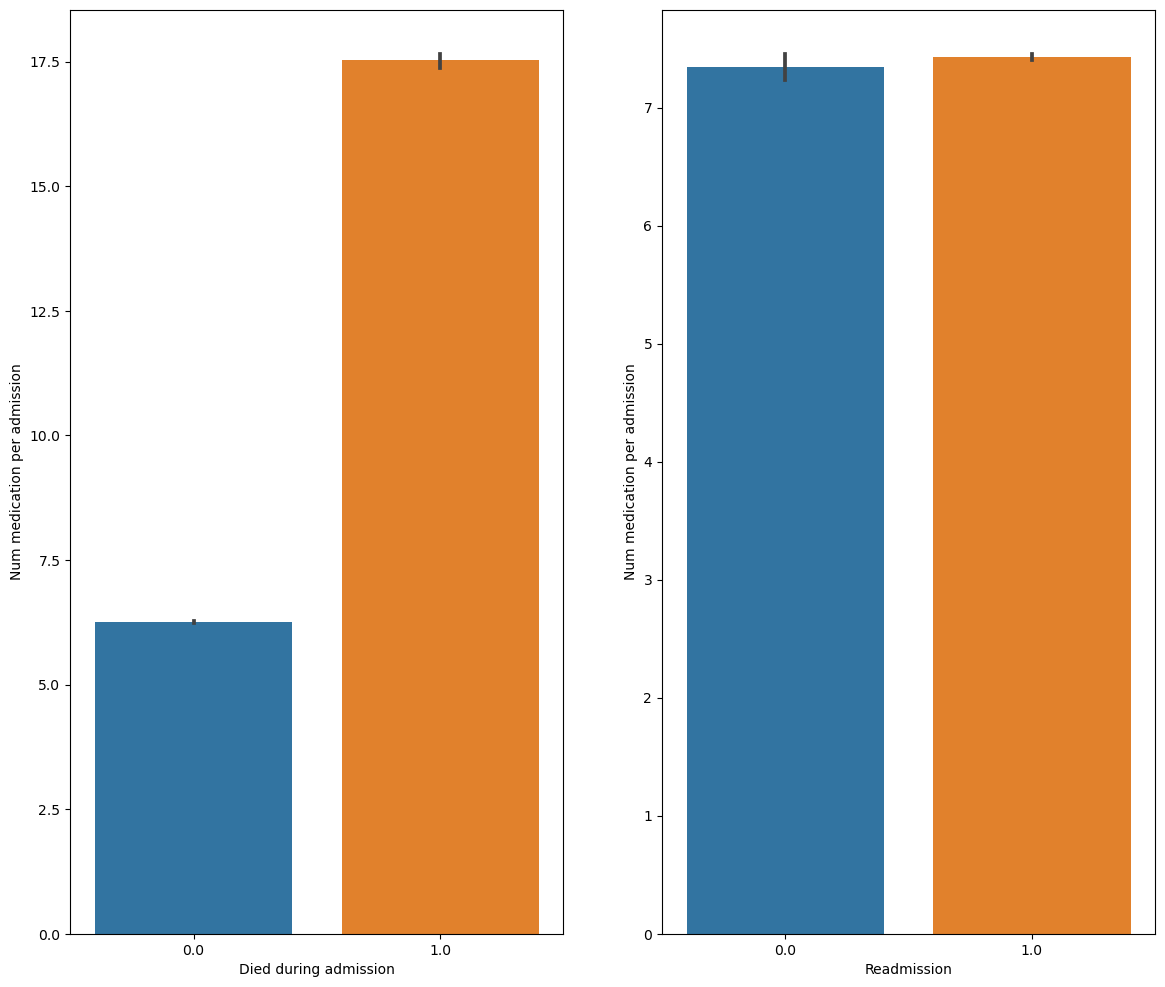

In [175]:
fig, qaxis = plt.subplots(1,2,figsize=(14,12))

sns.barplot(x=targets[0], y="Num medication per admission",  data=data, ax = qaxis[0])

sns.barplot(x=targets[1], y="Num medication per admission", data=data,ax  = qaxis[1])

In [177]:
data[data['Died during admission'] == 1].describe()

,Internalpatientid,Age at med ordered,Age at admission,Died during admission,Readmission,Num medication per admission,Total medications
count,61945.000000,61945.000000,61945.000000,61945.0,61945.000000,61945.000000,61945.000000
mean,86279.713375,75.519099,74.788350,1.0,0.925079,17.523303,793.333054
std,49376.950165,10.812407,10.789355,0.0,0.263266,18.971593,1785.172554
min,5.000000,26.894845,26.892303,1.0,0.000000,1.000000,1.000000
25%,42517.000000,67.912524,67.041182,1.0,1.000000,5.000000,63.000000
50%,88121.000000,76.004106,75.258371,1.0,1.000000,11.000000,196.000000
75%,129079.000000,83.679212,82.936448,1.0,1.000000,22.000000,673.000000
max,169062.000000,108.583053,108.576613,1.0,1.000000,138.000000,19642.000000


<Axes: xlabel='Readmission', ylabel='Num medication per admission'>

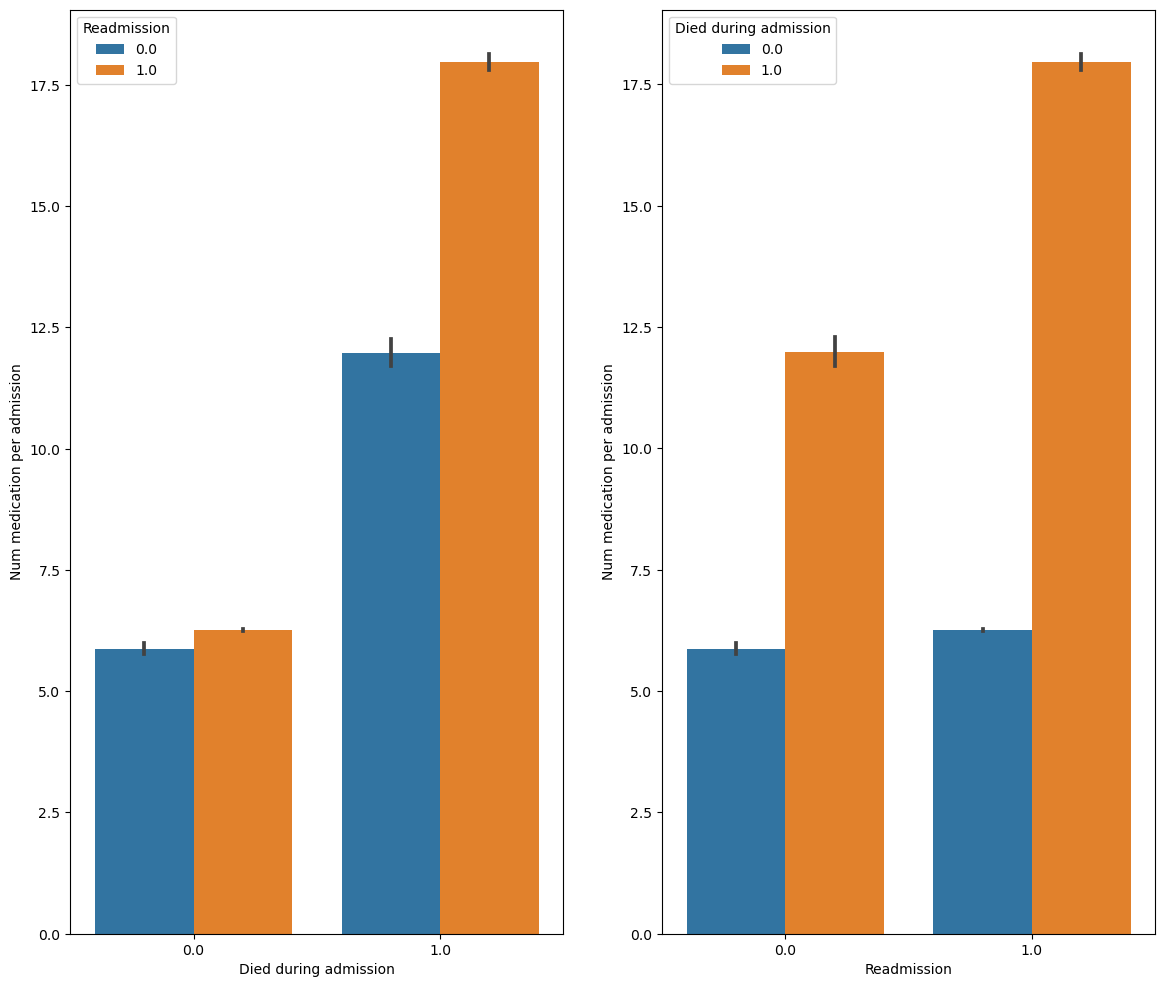

In [174]:
fig, qaxis = plt.subplots(1,2,figsize=(14,12))

sns.barplot(x=targets[0], y="Num medication per admission", hue=targets[1], data=data, ax = qaxis[0])

sns.barplot(x=targets[1], y="Num medication per admission", hue=targets[0], data=data,ax  = qaxis[1])

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA

scaler = StandardScaler()
X = data[['Num medication per admission','Total medications']]
Y = data[targets]

X1 = scaler.fit_transform(X)
Y1 = scaler.fit_transform(Y)

cca = CCA(n_components=2)
cca.fit(X1, Y1)

X_c, Y_c = cca.transform(X, Y)

#comp_corr = [np.corrcoef(X_c[:, i], Y_c[:, i])[1][0] for i in range(2)]
print(cca.x_loadings_)
print(cca.y_loadings_)

[[1.27066237 0.35555533]
 [0.52771317 0.93465523]]
[[ 1.00241024 -0.0385057 ]
 [-0.04328788  0.99925838]]


/home/hassan/.conda/envs/mla/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but CCA was fitted without feature names
  warnings.warn(


In [180]:
coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = [Y.columns])
coef_df.index = X.columns
coef_df 

/home/hassan/.conda/envs/mla/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


,Died during admission,Readmission
Num medication per admission,0.96,-0.57
Total medications,-0.41,1.29


/tmp/ipykernel_16217/3277974166.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


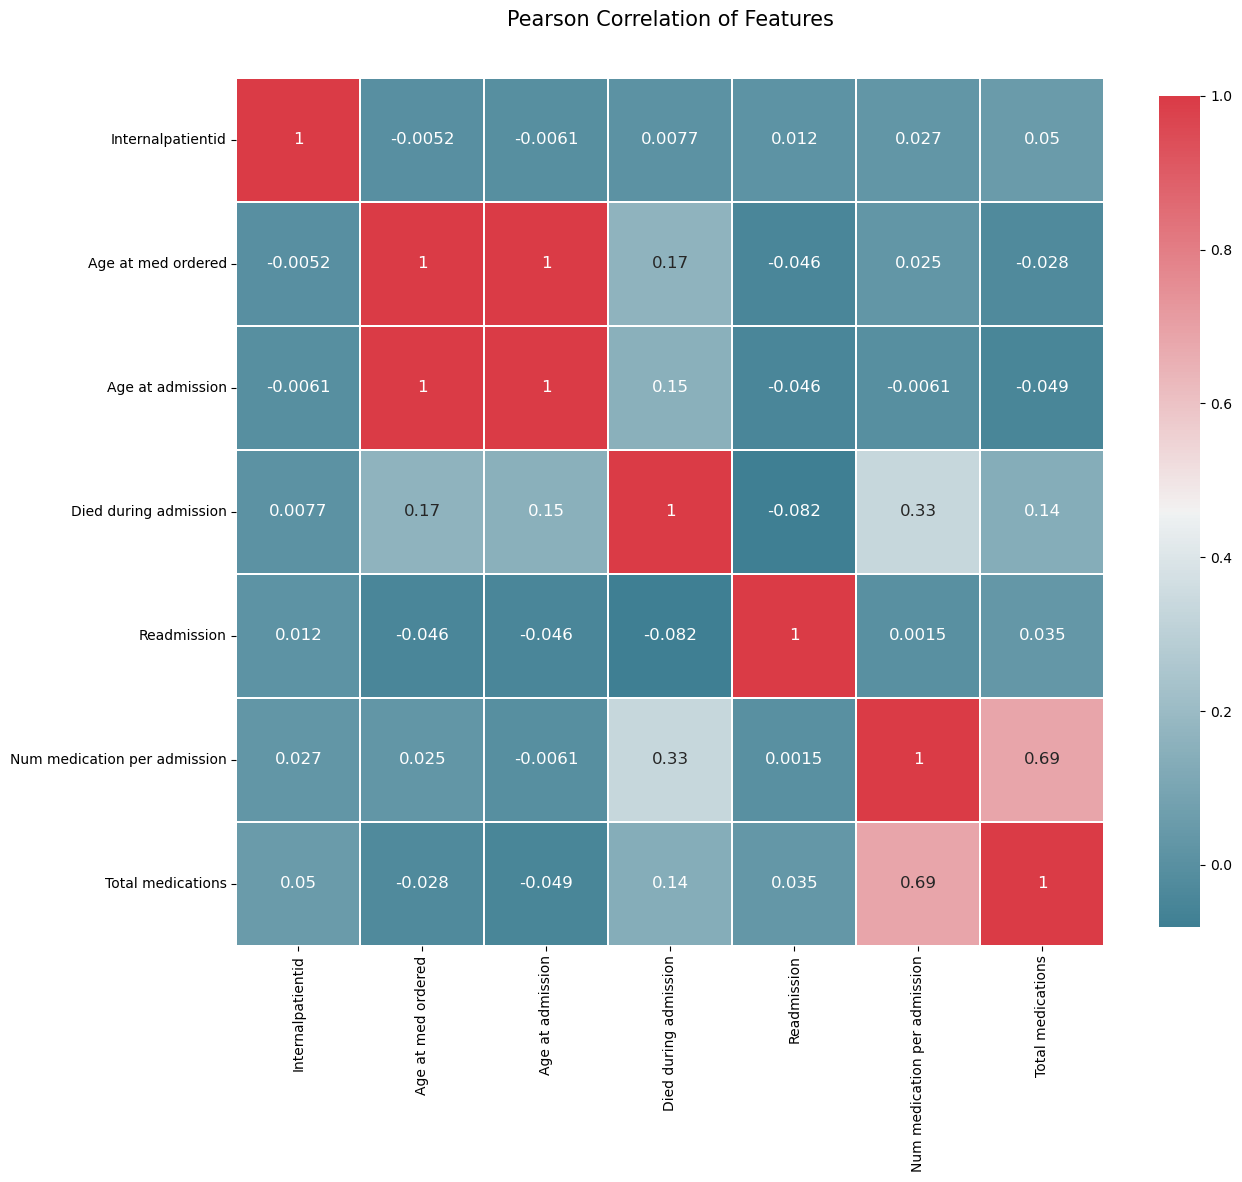

In [181]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

#correlation_heatmap(data[orig_cols+[target, target2]])
correlation_heatmap(data)